## Assignment_3_Answers
## Mathana Sekaran T

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [299]:
df=pd.read_csv("abalone.csv")

In [300]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [301]:
df["Rings"]=df["Rings"].apply(lambda x: x + 1.5)

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

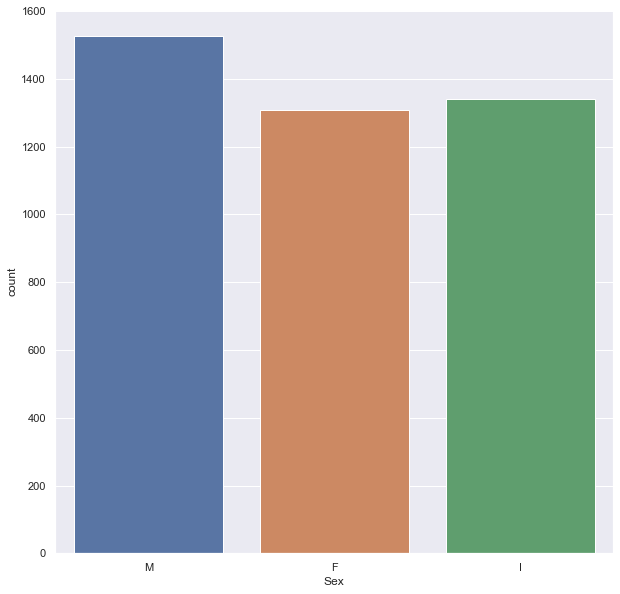

In [302]:
sns.countplot(df['Sex'])

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


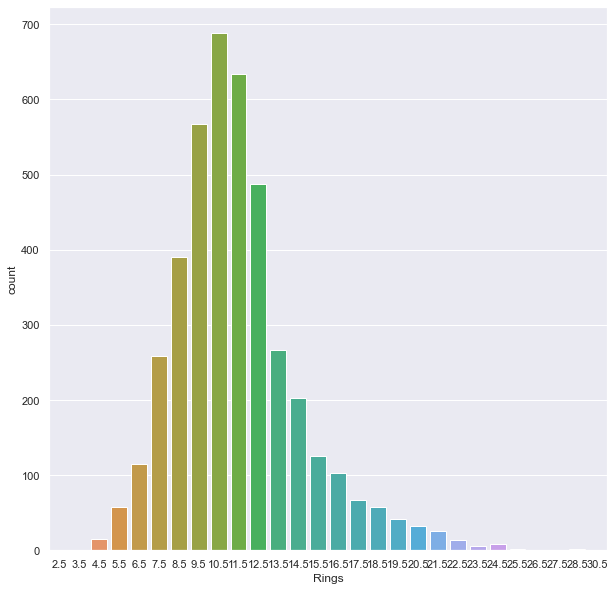

In [303]:
sns.countplot(df['Rings'])
sns.set(rc={'figure.figsize':(10,10)})

<AxesSubplot:xlabel='Diameter', ylabel='Count'>

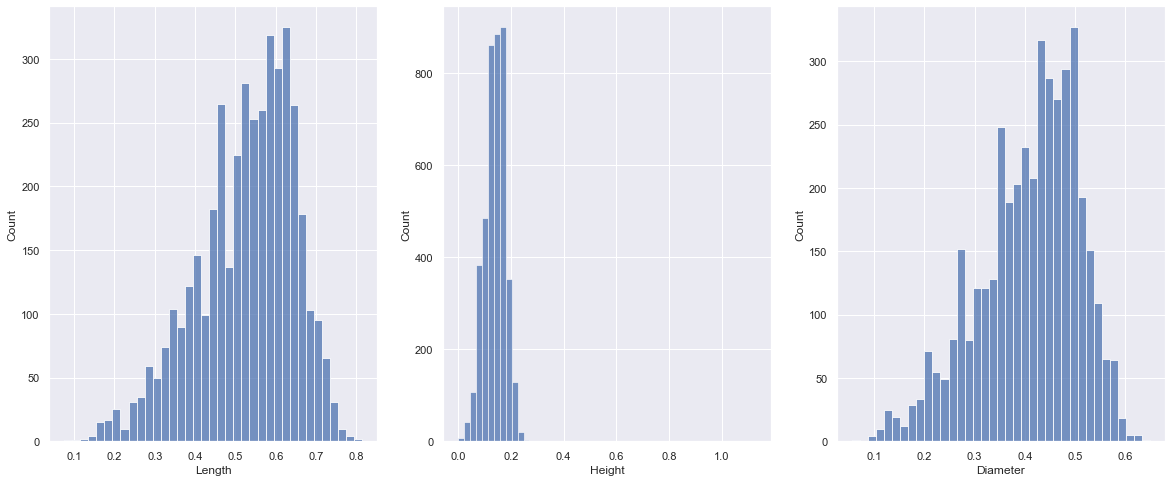

In [304]:


fig, axs= plt.subplots(1, 3, sharey=False,figsize=(20, 8))
sns.histplot(df['Length'], ax=axs[0])
sns.histplot(df['Height'], ax=axs[1],bins=50)
sns.histplot(df['Diameter'],ax=axs[2])



<AxesSubplot:xlabel='Shell weight', ylabel='Count'>

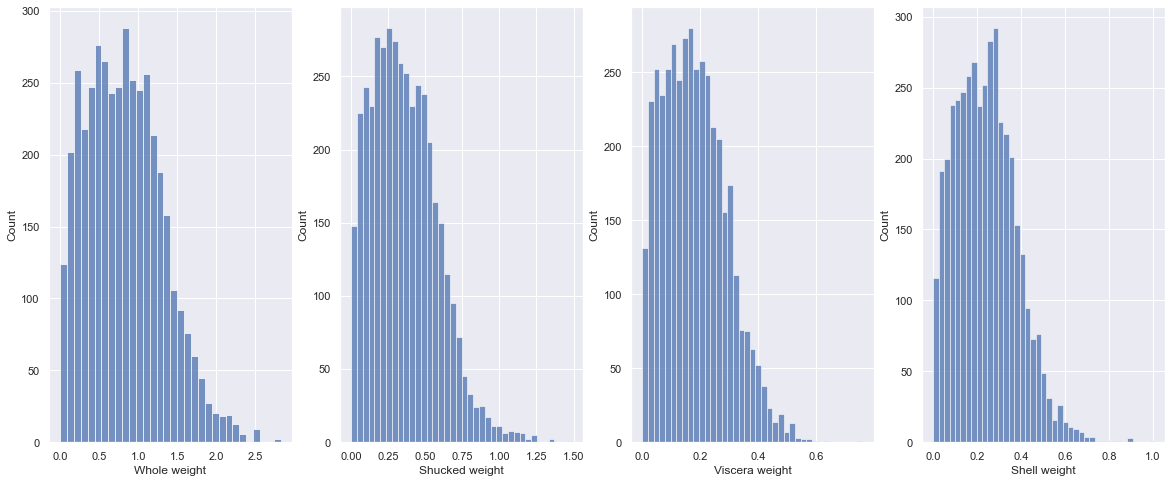

In [305]:
fig, axs= plt.subplots(1, 4, sharey=False,figsize=(20, 8))
sns.histplot(df['Whole weight'], ax=axs[0])
sns.histplot(df['Shucked weight'], ax=axs[1])
sns.histplot(df['Viscera weight'],ax=axs[2])
sns.histplot(df['Shell weight'],ax=axs[3])



c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

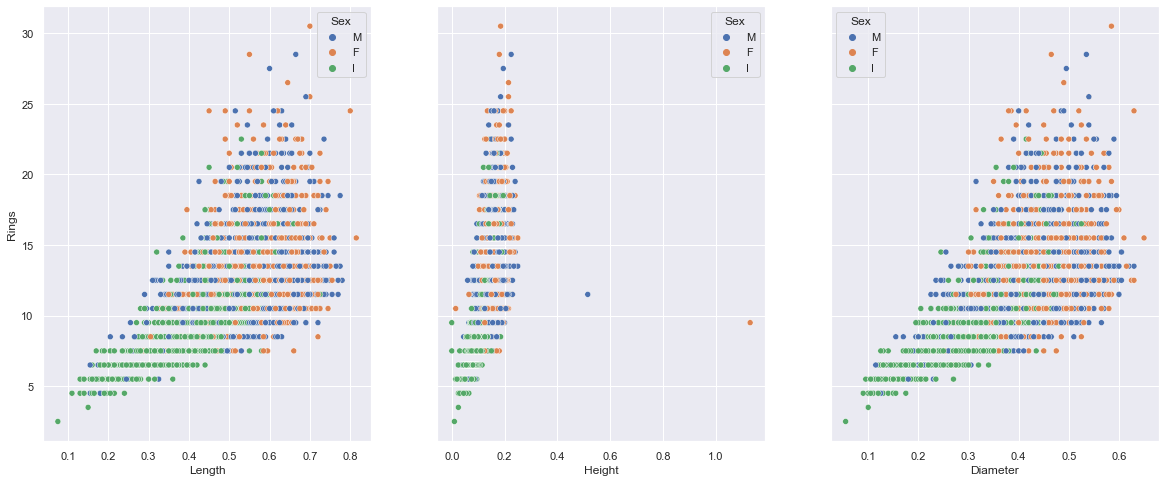

In [306]:


fig, axs= plt.subplots(1, 3, sharey=True,figsize=(20, 8))
sns.scatterplot(df['Length'],y=df["Rings"], ax=axs[0],hue=df['Sex'])
sns.scatterplot(df['Height'],y=df["Rings"], ax=axs[1],hue=df['Sex'])
sns.scatterplot(df['Diameter'],y=df["Rings"],ax=axs[2],hue=df['Sex'])



<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

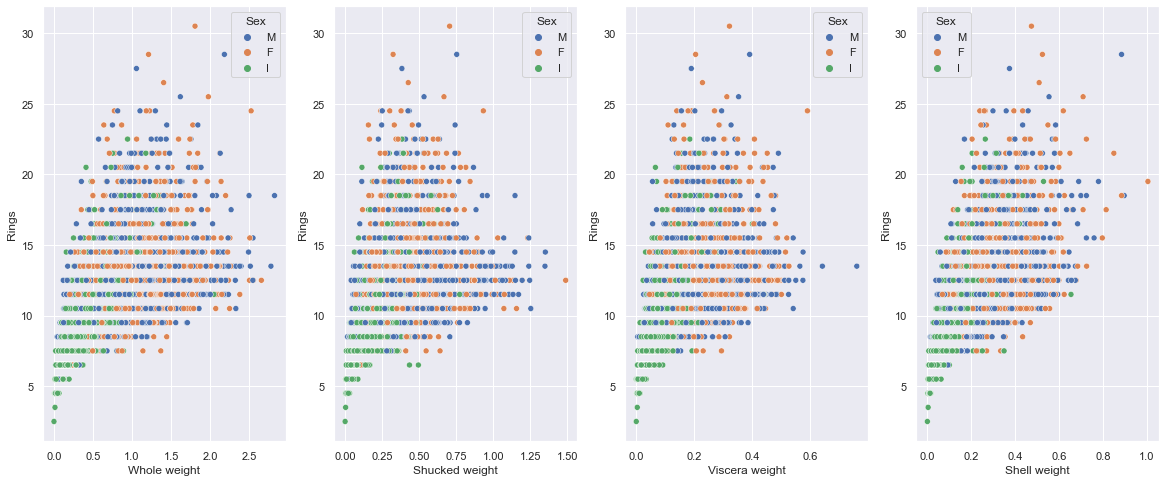

In [307]:
fig, axs= plt.subplots(1, 4, sharey=False,figsize=(20, 8))
sns.scatterplot(x=df['Whole weight'], y=df["Rings"], ax=axs[0], hue=df['Sex'])
sns.scatterplot(x=df['Shucked weight'], y=df["Rings"], ax=axs[1], hue=df['Sex'])
sns.scatterplot(x=df['Viscera weight'], y=df["Rings"], ax=axs[2], hue=df['Sex'])
sns.scatterplot(x=df['Shell weight'], y=df["Rings"], ax=axs[3], hue=df['Sex'])



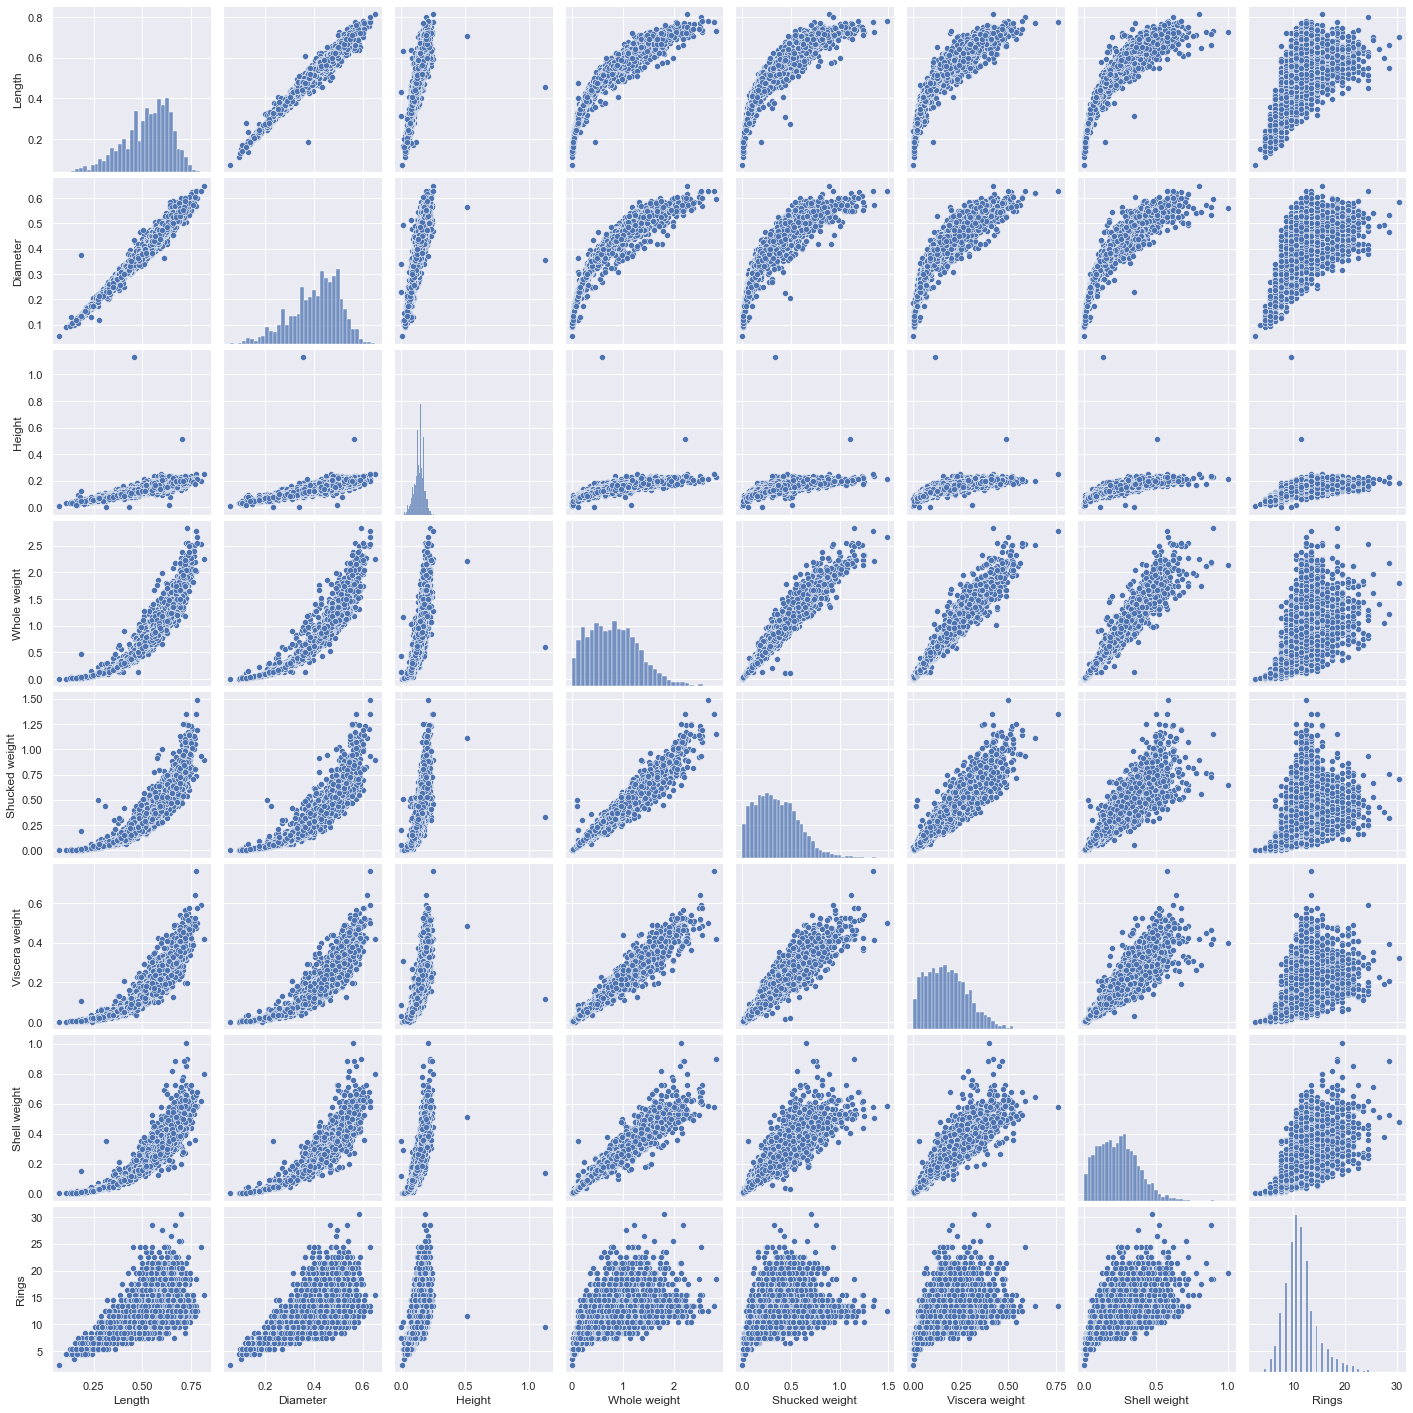

In [308]:
sns.pairplot(df)

In [309]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [311]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter'>

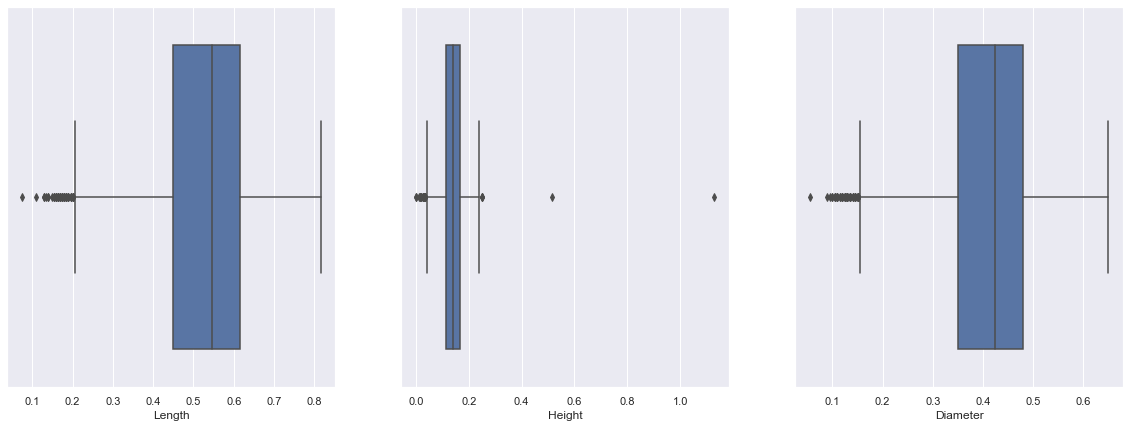

In [312]:

fig, axs= plt.subplots(1, 3, sharey=True,figsize=(20, 7))
sns.boxplot(df['Length'], ax=axs[0])
sns.boxplot(df['Height'], ax=axs[1])
sns.boxplot(df['Diameter'],ax=axs[2])



In [313]:
df['Length'] = np.where(df['Length']<.21,.21, df['Length'])
df['Height'] = np.where(df['Height']<.04,.04, df['Height'])
df['Height'] = np.where(df['Height']>.24, .04, df['Height'])
df['Diameter'] = np.where(df['Diameter']<.156,.156, df['Diameter'])

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter'>

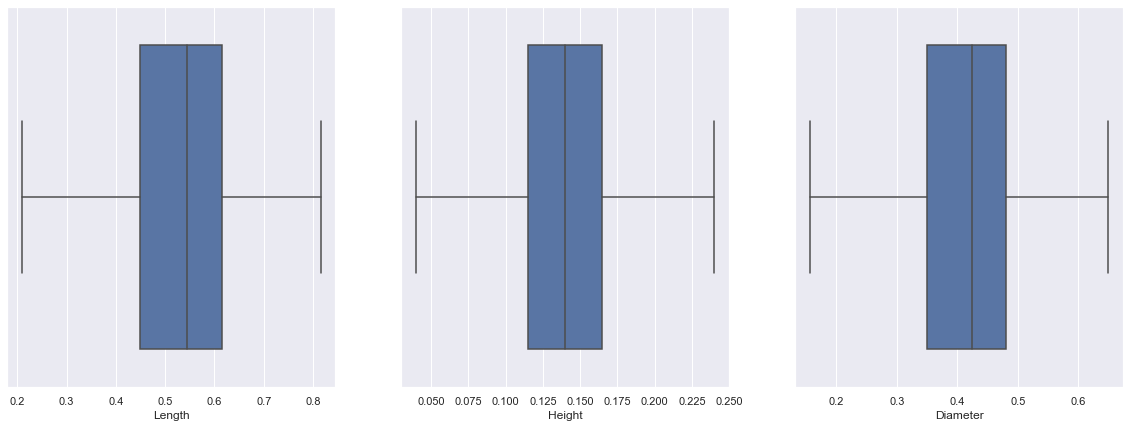

In [314]:

fig, axs= plt.subplots(1, 3, sharey=True,figsize=(20, 7))
sns.boxplot(df['Length'], ax=axs[0])
sns.boxplot(df['Height'], ax=axs[1])
sns.boxplot(df['Diameter'],ax=axs[2])



In [315]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [316]:

encoder=preprocessing.OneHotEncoder()
enc_data=pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray())
enc_data.drop(0,axis=1,inplace=True)


In [317]:
enc_data.head(10)

,1,2
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,1.0
9,0.0,0.0


In [318]:
df.drop(['Sex'],axis=1,inplace=True)

In [319]:
df=pd.concat([enc_data,df],axis=1)

In [320]:
df.head()

,1,2,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [321]:
X=df.iloc[:,0:9]

In [322]:
y=df.iloc[:,-1]

In [323]:
X.head()

,1,2,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [324]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(X)

c:\New folder\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\New folder\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [325]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=100)

In [326]:
X_test

array([[ 1.45345059, -0.75948762,  0.76258398, ...,  0.24841584,
         0.13144383,  0.76278603],
       [-0.68801788, -0.75948762,  1.43644804, ...,  1.50778577,
         1.09402516,  1.44532591],
       [-0.68801788,  1.31667716,  1.52068105, ...,  3.09607879,
         1.84675464,  2.07757338],
       ...,
       [-0.68801788, -0.75948762,  1.43644804, ...,  1.76011033,
         2.17978041,  2.66312076],
       [-0.68801788,  1.31667716,  0.25718594, ..., -0.23595721,
        -0.2563259 ,  0.15209245],
       [-0.68801788,  1.31667716, -1.09054218, ..., -1.17090984,
        -1.04555135, -1.06929471]])

In [327]:
model=LinearRegression()

In [328]:
model.fit(X_train,y_train)

LinearRegression()

In [329]:
pred=model.predict(X_test)

In [330]:
pred

array([12.88882948, 14.44557481, 12.69629711, ..., 17.75840082,
       12.97728437,  9.6636939 ])

In [331]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred)
print(mse**(.5))

2.2026331646490975
